<a href="https://colab.research.google.com/github/MAvRK7/Predicting-Stellar-Metallicity-A-Comparative-Analysis-of-Regression-Models-for-Solar-Twin-Stars/blob/main/StellarMetalicityPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Stellar Metallicity: A Comparative Analysis of Regression Models for Solar Twin Stars**

This project aims to predict the metallicity ([Fe/H]) of stars using various regression models, including Random Forest, Linear Regression, Decision Tree, Support Vector, and Gradient Boosting. The dataset comprises stellar parameters and chemical abundances from solar twin stars. The project involves preprocessing the data, handling missing values through imputation, training each regression model, making predictions, and evaluating the performance of each model using metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R²).

# **Random Forest Regressor**

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import numpy as np

# Load the data into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Datasets_Research_Paper/PROJECT-2/tablec1.csv')

# Define the features and target variable
features = ['Teff', 'logg', '[Na/Fe]', '[Mg/Fe]', '[Al/Fe]', '[Si/Fe]', '[Ca/Fe]',
            '[Sc/Fe]', '[Ti/Fe]', '[Cr/Fe]', '[Mn/Fe]', '[Ni/Fe]', '[Cu/Fe]', '[Zn/Fe]', '[Y/Fe]', '[Ba/Fe]',
            'e_Teff', 'e_logg', 'e_[Na/Fe]', 'e_[Mg/Fe]', 'e_[Al/Fe]', 'e_[Si/Fe]', 'e_[Ca/Fe]',
            'e_[Sc/Fe]', 'e_[Ti/Fe]', 'e_[Cr/Fe]', 'e_[Mn/Fe]', 'e_[Ni/Fe]', 'e_[Cu/Fe]', 'e_[Zn/Fe]', 'e_[Y/Fe]', 'e_[Ba/Fe]']
target = '[Fe/H]'

# Split the data into features and target variable
X = df[features]
y = df[target]

# Handle missing values by imputing
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = cross_val_score(rf_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
mae_scores = cross_val_score(rf_regressor, X, y, cv=kf, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(rf_regressor, X, y, cv=kf, scoring='r2')

# Convert negative MSE to positive and calculate RMSE
mse_scores = -mse_scores
mae_scores = -mae_scores
rmse_scores = np.sqrt(mse_scores)

# Calculate the mean and standard deviation of the scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)

mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Calculate the range of the target variable
range_y = y.max() - y.min()

# Calculate accuracies based on error metrics
accuracy_mse = (1 - mean_mse / range_y) * 100
accuracy_mae = (1 - mean_mae / range_y) * 100
accuracy_rmse = (1 - mean_rmse / range_y) * 100

# Calculate accuracy based on R²
accuracy_r2 = mean_r2 * 100

# Printing the error metrics and corresponding accuracy
print(f'Mean Squared Error (MSE): {mean_mse} ± {std_mse}')
print(f'Accuracy based on MSE: {accuracy_mse:.2f}%')

print(f'Mean Absolute Error (MAE): {mean_mae} ± {std_mae}')
print(f'Accuracy based on MAE: {accuracy_mae:.2f}%')

print(f'Root Mean Squared Error (RMSE): {mean_rmse} ± {std_rmse}')
print(f'Accuracy based on RMSE: {accuracy_rmse:.2f}%')

print(f'R-squared (R²): {mean_r2} ± {std_r2}')
print(f'Accuracy based on R²: {accuracy_r2:.2f}%')


Mean Squared Error (MSE): 0.0016282376367441286 ± 4.387266438202751e-05
Accuracy based on MSE: 99.83%
Mean Absolute Error (MAE): 0.028421949671005153 ± 0.0003785690335378769
Accuracy based on MAE: 97.03%
Root Mean Squared Error (RMSE): 0.04034774950456317 ± 0.0005447445834070319
Accuracy based on RMSE: 95.79%
R-squared (R²): 0.9266620808330737 ± 0.0014866368647005219
Accuracy based on R²: 92.67%


# **Lenear Regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import numpy as np

# Load the data
df = pd.read_csv('/content/drive/MyDrive/Datasets_Research_Paper/PROJECT-2/tablec1.csv')

# Define the features and target variable
features = ['Teff', 'logg', '[Na/Fe]', '[Mg/Fe]', '[Al/Fe]', '[Si/Fe]', '[Ca/Fe]',
            '[Sc/Fe]', '[Ti/Fe]', '[Cr/Fe]', '[Mn/Fe]', '[Ni/Fe]', '[Cu/Fe]', '[Zn/Fe]', '[Y/Fe]', '[Ba/Fe]',
            'e_Teff', 'e_logg', 'e_[Na/Fe]', 'e_[Mg/Fe]', 'e_[Al/Fe]', 'e_[Si/Fe]', 'e_[Ca/Fe]',
            'e_[Sc/Fe]', 'e_[Ti/Fe]', 'e_[Cr/Fe]', 'e_[Mn/Fe]', 'e_[Ni/Fe]', 'e_[Cu/Fe]', 'e_[Zn/Fe]', 'e_[Y/Fe]', 'e_[Ba/Fe]']
target = '[Fe/H]'

# Split the data into features and target variable
X = df[features]
y = df[target]

# Handle missing values by imputing
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Initialize the Linear Regression model
lr_regressor = LinearRegression()

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = cross_val_score(lr_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
mae_scores = cross_val_score(lr_regressor, X, y, cv=kf, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(lr_regressor, X, y, cv=kf, scoring='r2')

# Convert negative MSE to positive and calculate RMSE
mse_scores = -mse_scores
mae_scores = -mae_scores
rmse_scores = np.sqrt(mse_scores)

# Calculate the mean and standard deviation of the scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)

mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Calculate accuracies
accuracy_r2 = mean_r2 * 100

# Calculate the range of the target variable
range_y = y.max() - y.min()

# Accuracy based on error metrics
accuracy_mse = (1 - mean_mse / range_y) * 100
accuracy_mae = (1 - mean_mae / range_y) * 100
accuracy_rmse = (1 - mean_rmse / range_y) * 100

# Printing the error metrics and corresponding accuracy
print(f'Mean Squared Error (MSE): {mean_mse} ± {std_mse}')
print(f'Accuracy based on MSE: {accuracy_mse:.2f}%')

print(f'Mean Absolute Error (MAE): {mean_mae} ± {std_mae}')
print(f'Accuracy based on MAE: {accuracy_mae:.2f}%')

print(f'Root Mean Squared Error (RMSE): {mean_rmse} ± {std_rmse}')
print(f'Accuracy based on RMSE: {accuracy_rmse:.2f}%')

print(f'R-squared (R²): {mean_r2} ± {std_r2}')
print(f'Accuracy based on R²: {accuracy_r2:.2f}%')


Mean Squared Error (MSE): 0.003453611209098477 ± 0.00022018295990702735
Accuracy based on MSE: 99.64%
Mean Absolute Error (MAE): 0.04300434663753434 ± 0.0004540107786989759
Accuracy based on MAE: 95.51%
Root Mean Squared Error (RMSE): 0.05873815838274774 ± 0.0018547126197119446
Accuracy based on RMSE: 93.87%
R-squared (R²): 0.8443220117763905 ± 0.011499994916772246
Accuracy based on R²: 84.43%


# **Decision Tree Regressor**

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
import numpy as np

# Load the data
df = pd.read_csv('/content/drive/MyDrive/Datasets_Research_Paper/PROJECT-2/tablec1.csv')

# Define the features and target variable
features = ['Teff', 'logg', '[Na/Fe]', '[Mg/Fe]', '[Al/Fe]', '[Si/Fe]', '[Ca/Fe]',
            '[Sc/Fe]', '[Ti/Fe]', '[Cr/Fe]', '[Mn/Fe]', '[Ni/Fe]', '[Cu/Fe]', '[Zn/Fe]', '[Y/Fe]', '[Ba/Fe]',
            'e_Teff', 'e_logg', 'e_[Na/Fe]', 'e_[Mg/Fe]', 'e_[Al/Fe]', 'e_[Si/Fe]', 'e_[Ca/Fe]',
            'e_[Sc/Fe]', 'e_[Ti/Fe]', 'e_[Cr/Fe]', 'e_[Mn/Fe]', 'e_[Ni/Fe]', 'e_[Cu/Fe]', 'e_[Zn/Fe]', 'e_[Y/Fe]', 'e_[Ba/Fe]']
target = '[Fe/H]'

# Split the data into features and target variable
X = df[features]
y = df[target]

# Handle missing values by imputing
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = cross_val_score(dt_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
mae_scores = cross_val_score(dt_regressor, X, y, cv=kf, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(dt_regressor, X, y, cv=kf, scoring='r2')

# Convert negative MSE to positive and calculate RMSE
mse_scores = -mse_scores
mae_scores = -mae_scores
rmse_scores = np.sqrt(mse_scores)

# Calculate the mean and standard deviation of the scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)

mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Calculate the range of the target variable
range_y = y.max() - y.min()

# Calculate accuracies based on error metrics
accuracy_mse = (1 - mean_mse / range_y) * 100
accuracy_mae = (1 - mean_mae / range_y) * 100
accuracy_rmse = (1 - mean_rmse / range_y) * 100

# Calculate accuracy based on R²
accuracy_r2 = mean_r2 * 100

# Printing the error metrics and corresponding accuracy
print(f'Mean Squared Error (MSE): {mean_mse} ± {std_mse}')
print(f'Accuracy based on MSE: {accuracy_mse:.2f}%')

print(f'Mean Absolute Error (MAE): {mean_mae} ± {std_mae}')
print(f'Accuracy based on MAE: {accuracy_mae:.2f}%')

print(f'Root Mean Squared Error (RMSE): {mean_rmse} ± {std_rmse}')
print(f'Accuracy based on RMSE: {accuracy_rmse:.2f}%')

print(f'R-squared (R²): {mean_r2} ± {std_r2}')
print(f'Accuracy based on R²: {accuracy_r2:.2f}%')


Mean Squared Error (MSE): 0.004752508631317146 ± 0.00010652347374965934
Accuracy based on MSE: 99.50%
Mean Absolute Error (MAE): 0.049505794440086015 ± 0.0005968550490954398
Accuracy based on MAE: 94.83%
Root Mean Squared Error (RMSE): 0.06893414612559264 ± 0.0007694993519088023
Accuracy based on RMSE: 92.81%
R-squared (R²): 0.7858726259317088 ± 0.006145557859217267
Accuracy based on R²: 78.59%


# **Support Vector Regressor**

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
import numpy as np

# Load the data
df = pd.read_csv('/content/drive/MyDrive/Datasets_Research_Paper/PROJECT-2/tablec1.csv')

# Define the features and target variable
features = ['Teff', 'logg', '[Na/Fe]', '[Mg/Fe]', '[Al/Fe]', '[Si/Fe]', '[Ca/Fe]',
            '[Sc/Fe]', '[Ti/Fe]', '[Cr/Fe]', '[Mn/Fe]', '[Ni/Fe]', '[Cu/Fe]', '[Zn/Fe]', '[Y/Fe]', '[Ba/Fe]',
            'e_Teff', 'e_logg', 'e_[Na/Fe]', 'e_[Mg/Fe]', 'e_[Al/Fe]', 'e_[Si/Fe]', 'e_[Ca/Fe]',
            'e_[Sc/Fe]', 'e_[Ti/Fe]', 'e_[Cr/Fe]', 'e_[Mn/Fe]', 'e_[Ni/Fe]', 'e_[Cu/Fe]', 'e_[Zn/Fe]', 'e_[Y/Fe]', 'e_[Ba/Fe]']
target = '[Fe/H]'

# Split the data into features and target variable
X = df[features]
y = df[target]

# Handle missing values by imputing
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Initialize the Support Vector Regressor
svr_regressor = SVR()

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = cross_val_score(svr_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
mae_scores = cross_val_score(svr_regressor, X, y, cv=kf, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(svr_regressor, X, y, cv=kf, scoring='r2')

# Convert negative MSE to positive and calculate RMSE
mse_scores = -mse_scores
mae_scores = -mae_scores
rmse_scores = np.sqrt(mse_scores)

# Calculate the mean and standard deviation of the scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)

mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Calculate the range of the target variable
range_y = y.max() - y.min()

# Calculate accuracies based on error metrics
accuracy_mse = (1 - mean_mse / range_y) * 100
accuracy_mae = (1 - mean_mae / range_y) * 100
accuracy_rmse = (1 - mean_rmse / range_y) * 100

# Calculate accuracy based on R²
accuracy_r2 = mean_r2 * 100

# Printing the error metrics and corresponding accuracy
print(f'Mean Squared Error (MSE): {mean_mse} ± {std_mse}')
print(f'Accuracy based on MSE: {accuracy_mse:.2f}%')

print(f'Mean Absolute Error (MAE): {mean_mae} ± {std_mae}')
print(f'Accuracy based on MAE: {accuracy_mae:.2f}%')

print(f'Root Mean Squared Error (RMSE): {mean_rmse} ± {std_rmse}')
print(f'Accuracy based on RMSE: {accuracy_rmse:.2f}%')

print(f'R-squared (R²): {mean_r2} ± {std_r2}')
print(f'Accuracy based on R²: {accuracy_r2:.2f}%')


Mean Squared Error (MSE): 0.021933222828501405 ± 0.0003068354783650151
Accuracy based on MSE: 97.71%
Mean Absolute Error (MAE): 0.1231933668668775 ± 0.0009311649208304122
Accuracy based on MAE: 87.14%
Root Mean Squared Error (RMSE): 0.14809506411577006 ± 0.0010367319071746246
Accuracy based on RMSE: 84.54%
R-squared (R²): 0.012038501143375369 ± 0.0017775823350106167
Accuracy based on R²: 1.20%


# **Gradient Booster Regressor**

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer
import numpy as np

# Load the data
df = pd.read_csv('/content/drive/MyDrive/Datasets_Research_Paper/PROJECT-2/tablec1.csv')

# Define the features and target variable
features = ['Teff', 'logg', '[Na/Fe]', '[Mg/Fe]', '[Al/Fe]', '[Si/Fe]', '[Ca/Fe]',
            '[Sc/Fe]', '[Ti/Fe]', '[Cr/Fe]', '[Mn/Fe]', '[Ni/Fe]', '[Cu/Fe]', '[Zn/Fe]', '[Y/Fe]', '[Ba/Fe]',
            'e_Teff', 'e_logg', 'e_[Na/Fe]', 'e_[Mg/Fe]', 'e_[Al/Fe]', 'e_[Si/Fe]', 'e_[Ca/Fe]',
            'e_[Sc/Fe]', 'e_[Ti/Fe]', 'e_[Cr/Fe]', 'e_[Mn/Fe]', 'e_[Ni/Fe]', 'e_[Cu/Fe]', 'e_[Zn/Fe]', 'e_[Y/Fe]', 'e_[Ba/Fe]']
target = '[Fe/H]'

# Split the data into features and target variable
X = df[features]
y = df[target]

# Handle missing values by imputing
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = cross_val_score(gb_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
mae_scores = cross_val_score(gb_regressor, X, y, cv=kf, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(gb_regressor, X, y, cv=kf, scoring='r2')

# Convert negative MSE to positive and calculate RMSE
mse_scores = -mse_scores
mae_scores = -mae_scores
rmse_scores = np.sqrt(mse_scores)

# Calculate the mean and standard deviation of the scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)

mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Calculate the range of the target variable
range_y = y.max() - y.min()

# Calculate accuracies based on error metrics
accuracy_mse = (1 - mean_mse / range_y) * 100
accuracy_mae = (1 - mean_mae / range_y) * 100
accuracy_rmse = (1 - mean_rmse / range_y) * 100

# Calculate accuracy based on R²
accuracy_r2 = mean_r2 * 100

# Printing the error metrics and corresponding accuracy
print(f'Mean Squared Error (MSE): {mean_mse} ± {std_mse}')
print(f'Accuracy based on MSE: {accuracy_mse:.2f}%')

print(f'Mean Absolute Error (MAE): {mean_mae} ± {std_mae}')
print(f'Accuracy based on MAE: {accuracy_mae:.2f}%')

print(f'Root Mean Squared Error (RMSE): {mean_rmse} ± {std_rmse}')
print(f'Accuracy based on RMSE: {accuracy_rmse:.2f}%')

print(f'R-squared (R²): {mean_r2} ± {std_r2}')
print(f'Accuracy based on R²: {accuracy_r2:.2f}%')


Mean Squared Error (MSE): 0.002189703054157826 ± 5.587632244091379e-05
Accuracy based on MSE: 99.77%
Mean Absolute Error (MAE): 0.03476481845352488 ± 0.0003406422732719079
Accuracy based on MAE: 96.37%
Root Mean Squared Error (RMSE): 0.04679041800601648 ± 0.0005998641346800023
Accuracy based on RMSE: 95.12%
R-squared (R²): 0.9013481282662354 ± 0.0028369170152989657
Accuracy based on R²: 90.13%


Bar Plot of R-squared Values:

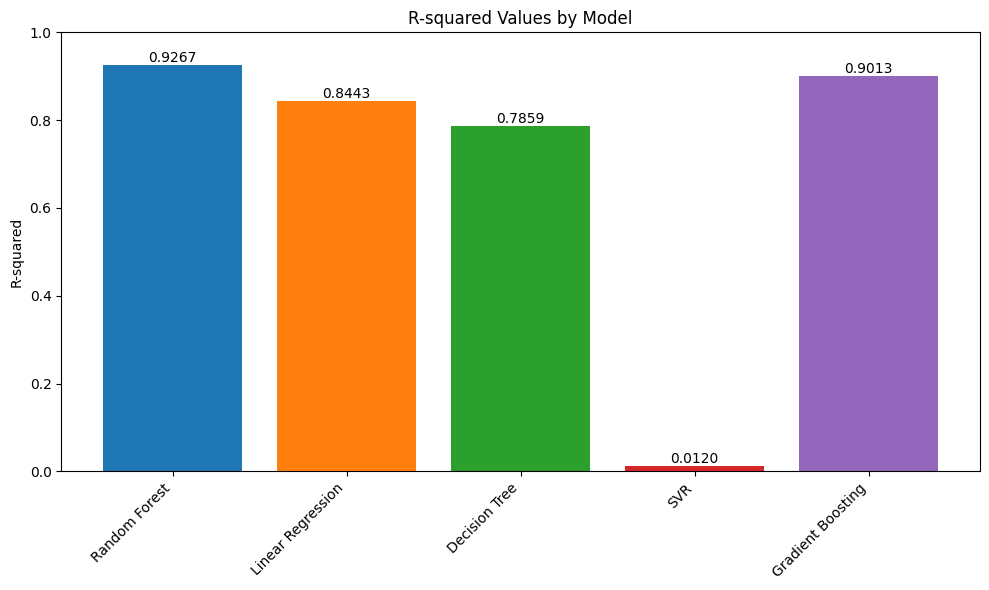

In [ ]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'Linear Regression', 'Decision Tree', 'SVR', 'Gradient Boosting']
r2_values = [0.9267, 0.8443, 0.7859, 0.0120, 0.9013]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, r2_values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('R-squared Values by Model')
plt.ylabel('R-squared')
plt.ylim(0, 1.0)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}', ha='center', va='bottom')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Error Metrics Comparison:

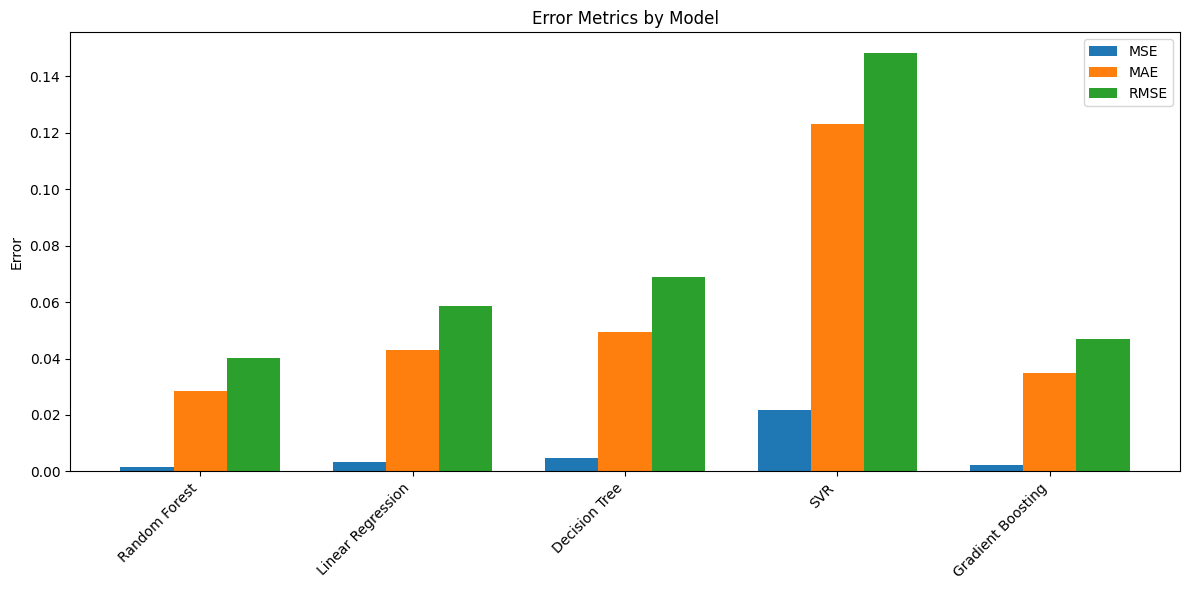

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

models = ['Random Forest', 'Linear Regression', 'Decision Tree', 'SVR', 'Gradient Boosting']
mse = [0.0016, 0.0035, 0.0048, 0.0219, 0.0022]
mae = [0.0284, 0.0430, 0.0495, 0.1232, 0.0348]
rmse = [0.0403, 0.0587, 0.0689, 0.1481, 0.0468]

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width, mse, width, label='MSE', color='#1f77b4')
ax.bar(x, mae, width, label='MAE', color='#ff7f0e')
ax.bar(x + width, rmse, width, label='RMSE', color='#2ca02c')

ax.set_ylabel('Error')
ax.set_title('Error Metrics by Model')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

Accuracy Comparison:

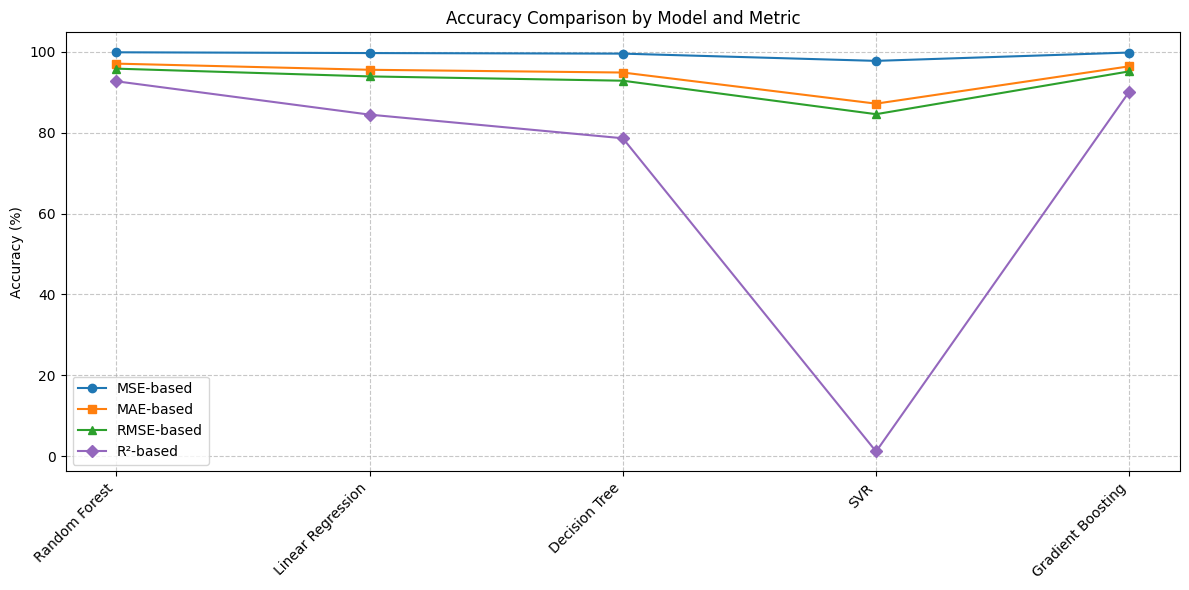

In [ ]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'Linear Regression', 'Decision Tree', 'SVR', 'Gradient Boosting']
accuracy_mse = [99.83, 99.64, 99.50, 97.71, 99.77]
accuracy_mae = [97.03, 95.51, 94.83, 87.14, 96.37]
accuracy_rmse = [95.79, 93.87, 92.81, 84.54, 95.12]
accuracy_r2 = [92.67, 84.43, 78.59, 1.20, 90.13]

plt.figure(figsize=(12, 6))
plt.plot(models, accuracy_mse, marker='o', label='MSE-based', color='#1f77b4')
plt.plot(models, accuracy_mae, marker='s', label='MAE-based', color='#ff7f0e')
plt.plot(models, accuracy_rmse, marker='^', label='RMSE-based', color='#2ca02c')
plt.plot(models, accuracy_r2, marker='D', label='R²-based', color='#9467bd')

plt.title('Accuracy Comparison by Model and Metric')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

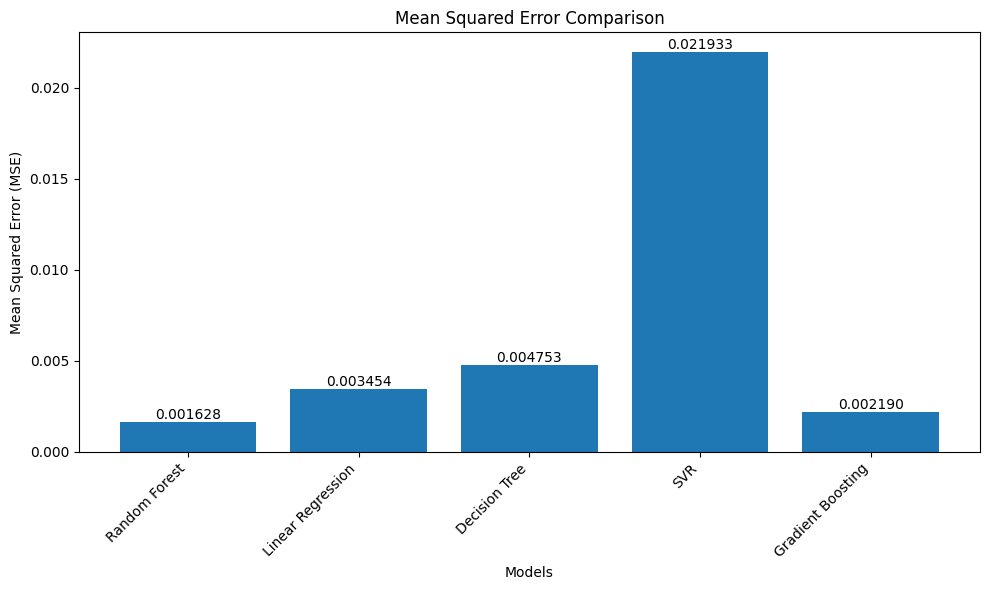

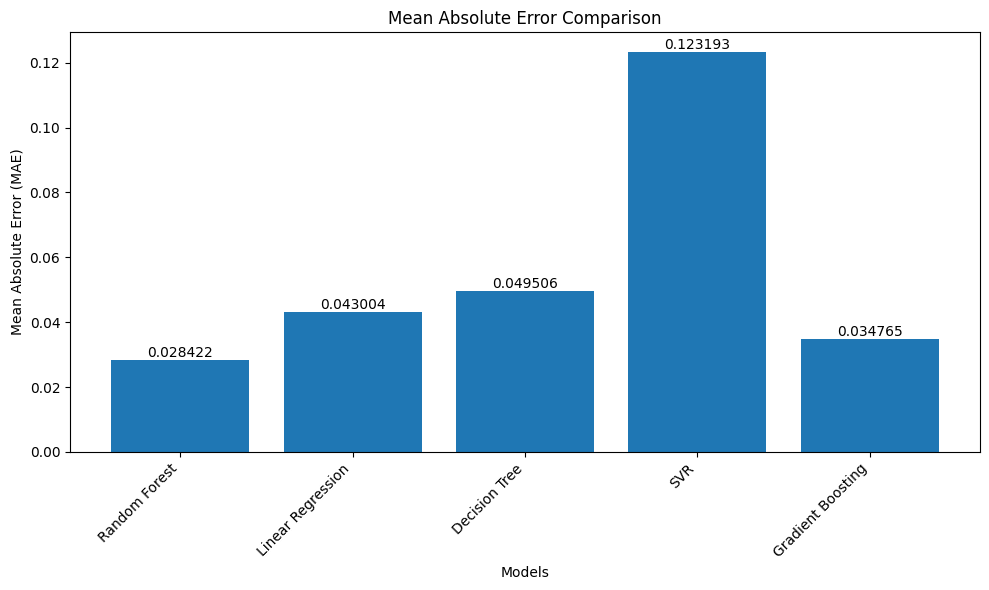

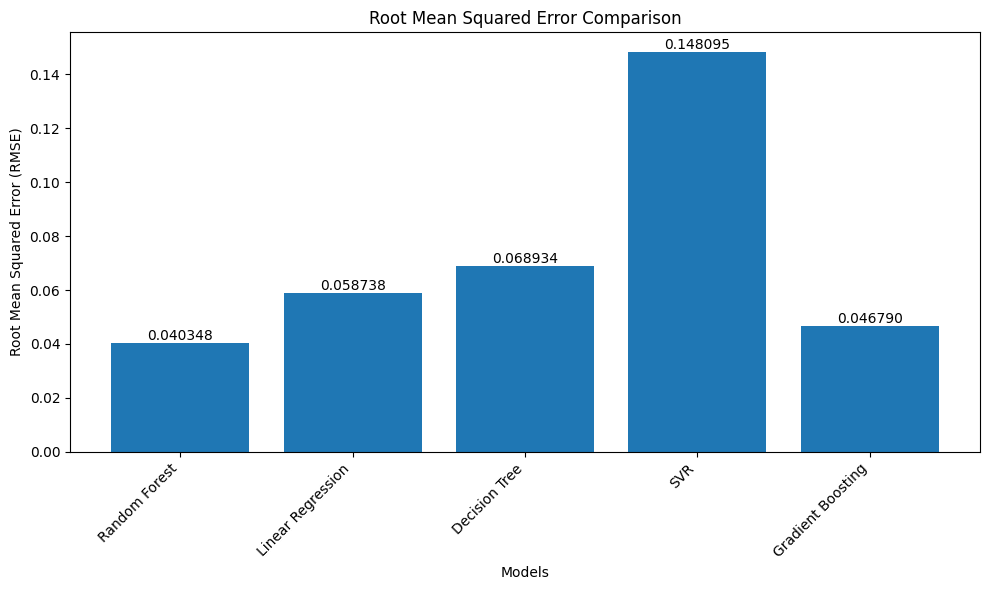

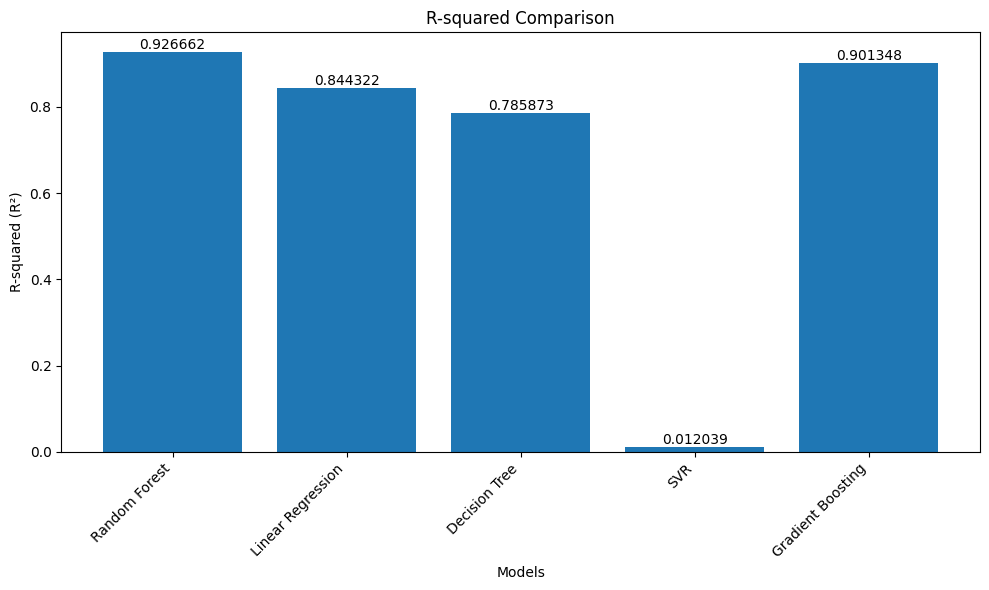

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Random Forest', 'Linear Regression', 'Decision Tree', 'SVR', 'Gradient Boosting']
mse = [0.001628, 0.003454, 0.004753, 0.021933, 0.002190]
mae = [0.028422, 0.043004, 0.049506, 0.123193, 0.034765]
rmse = [0.040348, 0.058738, 0.068934, 0.148095, 0.046790]
r_squared = [0.926662, 0.844322, 0.785873, 0.012039, 0.901348]

# Function to create bar plots
def create_bar_plot(metric, values, title):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(models, values)
    plt.title(title)
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.6f}',
                 ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Create plots for each metric
create_bar_plot('Mean Squared Error (MSE)', mse, 'Mean Squared Error Comparison')
create_bar_plot('Mean Absolute Error (MAE)', mae, 'Mean Absolute Error Comparison')
create_bar_plot('Root Mean Squared Error (RMSE)', rmse, 'Root Mean Squared Error Comparison')
create_bar_plot('R-squared (R²)', r_squared, 'R-squared Comparison')

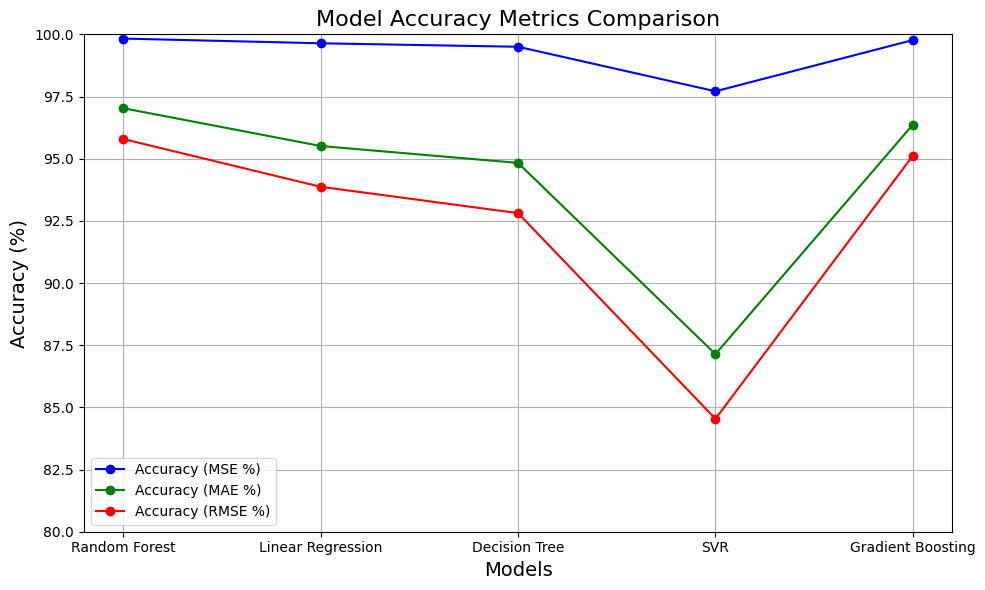

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Random Forest', 'Linear Regression', 'Decision Tree', 'SVR', 'Gradient Boosting']

# Accuracy percentages for MSE, MAE, and RMSE
accuracy_mse = [99.83, 99.64, 99.50, 97.71, 99.77]
accuracy_mae = [97.03, 95.51, 94.83, 87.14, 96.37]
accuracy_rmse = [95.79, 93.87, 92.81, 84.54, 95.12]

# Create a line graph
plt.figure(figsize=(10, 6))

# Plot each accuracy metric
plt.plot(models, accuracy_mse, marker='o', label='Accuracy (MSE %)', color='blue')
plt.plot(models, accuracy_mae, marker='o', label='Accuracy (MAE %)', color='green')
plt.plot(models, accuracy_rmse, marker='o', label='Accuracy (RMSE %)', color='red')

# Adding titles and labels
plt.title('Model Accuracy Metrics Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.ylim(80, 100)  # Set limits for better visibility
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()